In [3]:
import numpy as np
import cv2 as cv
import sys
import matplotlib.pyplot as plt
import math

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


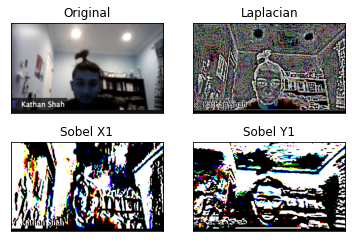

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


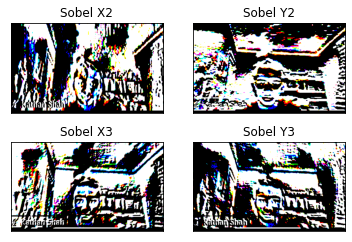

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


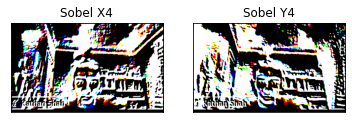

In [4]:
img = cv.imread('TestImg.jpg')
laplacian = cv.Laplacian(img,cv.CV_64F)

"""first set of four directions"""
sobelx1 = cv.Sobel(img,cv.CV_64F,1,0,ksize=5, scale=1)
sobely1 = cv.Sobel(img,cv.CV_64F,0,1,ksize=5, scale=1)
sobelx2 = cv.Sobel(img,cv.CV_64F,1,0,ksize=5, scale=-1)
sobely2 = cv.Sobel(img,cv.CV_64F,0,1,ksize=5, scale=-1)

"""second set of four directions"""
sobelx3 = cv.Sobel(img,cv.CV_64F,1,0,ksize=5, scale=math.sqrt(2)/2) + cv.Sobel(img,cv.CV_64F,0,1,ksize=5, scale=math.sqrt(2)/2)
sobely3 = cv.Sobel(img,cv.CV_64F,1, 0,ksize=5, scale=-math.sqrt(2)/2) + cv.Sobel(img,cv.CV_64F,0,1,ksize=5, scale=math.sqrt(2)/2)
sobelx4 = cv.Sobel(img,cv.CV_64F,1, 0,ksize=5, scale=-math.sqrt(2)/2) + cv.Sobel(img,cv.CV_64F,0, 1,ksize=5, scale=-math.sqrt(2)/2)
sobely4 = cv.Sobel(img,cv.CV_64F,1, 0,ksize=5, scale=math.sqrt(2)/2) + cv.Sobel(img,cv.CV_64F,0, 1,ksize=5, scale=-math.sqrt(2)/2)

plt.subplot(2,2,1),plt.imshow(img,cmap = 'gray')
plt.title('Original'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(laplacian, cmap = 'gray')
plt.title('Laplacian'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx1,cmap = 'gray')
plt.title('Sobel X1'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely1,cmap = 'gray')
plt.title('Sobel Y1'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(2,2,1),plt.imshow(sobelx2,cmap = 'gray')
plt.title('Sobel X2'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobely2,cmap = 'gray')
plt.title('Sobel Y2'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(sobelx3,cmap = 'gray')
plt.title('Sobel X3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely3,cmap = 'gray')
plt.title('Sobel Y3'), plt.xticks([]), plt.yticks([])
plt.show()
plt.subplot(2,2,1),plt.imshow(sobelx4,cmap = 'gray')
plt.title('Sobel X4'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobely4,cmap = 'gray')
plt.title('Sobel Y4'), plt.xticks([]), plt.yticks([])
plt.show()

In [6]:
"""Need to figure out dimensions of gaussian kernel -> not specified in paper (until page 3)"""
sd1 = 2.55
sd2 = 3*sd1
sd3 = 5*sd1
size = 8 #couldn't find in paper
retval = cv.getGaussianKernel(size, sd1)

In [7]:
#dst=cv.sepFilter2D(src, ddepth, kernelX, kernelY[, dst[, anchor[, delta[, borderType]]]])
def convolutionCalc(img, retval=retval): 
    dst = cv.filter2D(img, -1, retval)
    retval = cv.getGaussianKernel(size, math.sqrt(sd2 - sd1))
    dst = cv.filter2D(dst, -1, retval)
    retval = cv.getGaussianKernel(size, math.sqrt(sd3 - sd2))
    dst = cv.filter2D(dst, -1, retval)
    return dst

In [8]:
convx1 = convolutionCalc(sobelx1)
convy1 = convolutionCalc(sobely1)

convx2 = convolutionCalc(sobelx2)
convy2 = convolutionCalc(sobely2)

convx3 = convolutionCalc(sobelx3)
convy3 = convolutionCalc(sobely3)

convx4 = convolutionCalc(sobelx4)
convy4 = convolutionCalc(sobely4)

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


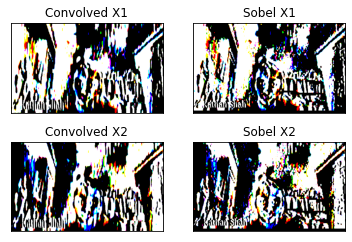

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


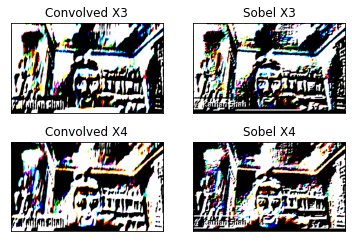

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


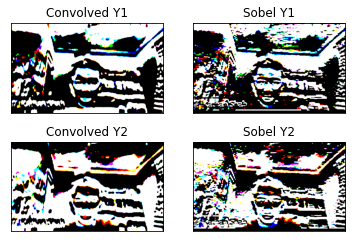

Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).
Clipping input data to the valid range for imshow with RGB data ([0..1] for floats or [0..255] for integers).


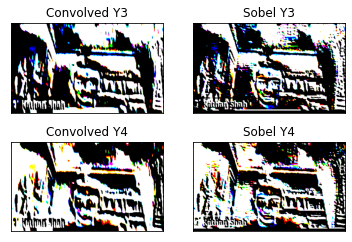

In [9]:
plt.subplot(2,2,1), plt.imshow(convx1,cmap = 'gray')
plt.title('Convolved X1'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx1, cmap = 'gray')
plt.title('Sobel X1'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(convx2,cmap = 'gray')
plt.title('Convolved X2'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobelx2,cmap = 'gray')
plt.title('Sobel X2'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(2,2,1), plt.imshow(convx3,cmap = 'gray')
plt.title('Convolved X3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobelx3, cmap = 'gray')
plt.title('Sobel X3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(convx4,cmap = 'gray')
plt.title('Convolved X4'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobelx4,cmap = 'gray')
plt.title('Sobel X4'), plt.xticks([]), plt.yticks([])
plt.show()


plt.subplot(2,2,1), plt.imshow(convy1,cmap = 'gray')
plt.title('Convolved Y1'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobely1, cmap = 'gray')
plt.title('Sobel Y1'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(convy2,cmap = 'gray')
plt.title('Convolved Y2'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely2,cmap = 'gray')
plt.title('Sobel Y2'), plt.xticks([]), plt.yticks([])
plt.show()

plt.subplot(2,2,1), plt.imshow(convy3,cmap = 'gray')
plt.title('Convolved Y3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,2),plt.imshow(sobely3, cmap = 'gray')
plt.title('Sobel Y3'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,3),plt.imshow(convy4,cmap = 'gray')
plt.title('Convolved Y4'), plt.xticks([]), plt.yticks([])
plt.subplot(2,2,4),plt.imshow(sobely4,cmap = 'gray')
plt.title('Sobel Y4'), plt.xticks([]), plt.yticks([])
plt.show()

In [ ]:
""""Attempt to calculate descriptor from first principles"""
def descriptorCalc(x, y, img):
    h = []
    h.append([convx1[x][y], convx2[x][y], convx3[x][y], convx4[x][y], convy1[x][y], convy2[x][y], convy3[x][y], convy4[x][y]]#assuming its x, then y
    unitvect = []
    r1 = 2.5 
    r2 = 3*r1
    r3 = 6*r1
    for R in [r1, r2, r3]: 
        for x, y in [[1, 0], [1, 1], [0, 1], [-1, 1], [-1, 0], [-1, -1], [0, -1], [1, -1]]:
             h.append([convx1[x + R*x][y + R*y], convx2[x + R*x][y + R*y], convx3[x + R*x][y + R*y], convx4[x + R*x][y + R*y], convy1[x + R*x][y + R*y], convy2[x + R*x][y + R*y], convy3[x + R*x][y + R*y], convy4[x + R*x][y + R*y]]

In [83]:
"""what are the 3 demensions? of each descriptor value?"""
print(sobelx1[1][2])
print(convx1[1][2])

[448. 464. 432.]
[449.34300356 464.54161217 436.70383197]


In [ ]:
"""Attempt to calculate descriptor using cv packages"""
key, desc = cv.Feature2D.compute(img)

In [ ]:
"""Attempt to calculate descriptor using cv packages"""
import cv2
import numpy as np

img = cv2.imread('TestImg.jpg')
 
gray= cv2.cvtColor(img, cv2.COLOR_BGR2GRAY) 

sift = cv2.SIFT()

kp, des = sift.detectAndCompute(gray,None)

In [5]:
"""Attempt to calculate descriptor using cv packages"""
kp = sift.detect(gray,None) 

img=cv2.drawKeypoints(gray,kp) 

cv2.imwrite('sift_keypoints.jpg',img)

NameError: name 'sift' is not defined